In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#!pip install gdown
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1APZg-_QpvUCoXdEXsZ7QYLQlPLov8j2b'
output = 'data.parquet'
gdown.download(url, output, quiet=False)

df = pd.read_parquet(output)


Downloading...
From (uriginal): https://drive.google.com/uc?id=1APZg-_QpvUCoXdEXsZ7QYLQlPLov8j2b
From (redirected): https://drive.google.com/uc?id=1APZg-_QpvUCoXdEXsZ7QYLQlPLov8j2b&confirm=t&uuid=ca32809b-de82-421a-850e-7b4bf137672d
To: /Users/achain/Documents/github/labo3-2023-ba/data.parquet
100%|██████████| 201M/201M [01:23<00:00, 2.40MB/s] 


In [4]:
tn_mas_cols = df.filter(like='tn_mas_1').columns
print(tn_mas_cols)


Index(['tn_mas_1', 'tn_mas_1_scaled'], dtype='object')


In [5]:
df.periodo.max()bytearray

201902

In [1]:
import pandas as pd

# Assuming 'periodo' is the variable by which you want to group
# and 'df' is your DataFrame
result = df.groupby('periodo').apply(lambda x: x.isnull().sum())



NameError: name 'df' is not defined

<AxesSubplot:title={'center':'Missing values by period'}, xlabel='periodo'>

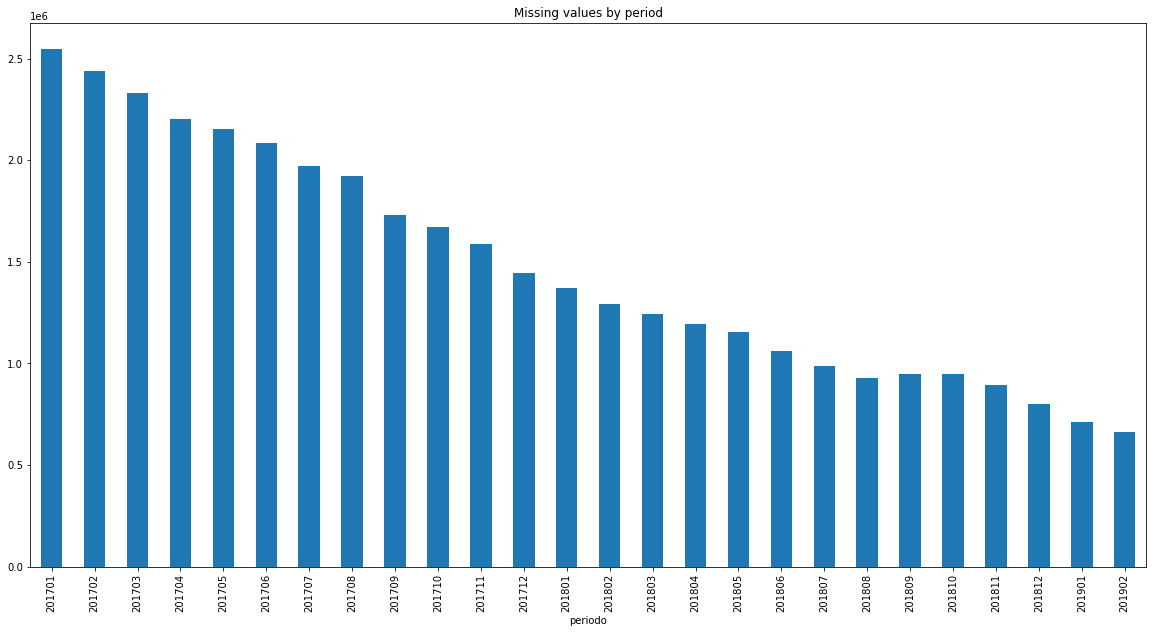

In [ ]:

result.sum(axis=1).plot(kind='bar', figsize=(20,10), title='Missing values by period')

In [8]:
# Convert categorical features to numerical format
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

In [9]:
df.cat_1_2_3

0        45
1        45
2        45
3        45
4        45
         ..
21988    -1
21989    -1
21990    -1
21991    -1
21992    -1
Name: cat_1_2_3, Length: 21993, dtype: int8

In [10]:
# train y test
X_train=df[(df.periodo>=201801)&(df.periodo<=201901)]
X_test=df[(df.periodo==201902)]
Y_train=df[(df.periodo>=201801)&(df.periodo<=201901)][['id_row','tn_mas_1_scaled','tn_mas_2_scaled']]
Y_test=df[(df.periodo==201902)][['id_row','tn_mas_1_scaled','tn_mas_2_scaled']]

In [11]:
# train y test
X_train=df[(df.periodo<=201901)]
X_test=df[(df.periodo==201902)]
Y_train=df[(df.periodo<=201901)][['id_row','tn_mas_1_scaled','tn_mas_2_scaled']]
Y_test=df[(df.periodo==201902)][['id_row','tn_mas_1_scaled','tn_mas_2_scaled']]

In [12]:
X_train=X_train.drop(['id_row','periodo','tn_mas_1_scaled','tn_mas_2_scaled','tn_mas_1','tn_mas_2'],axis=1)
X_test=X_test.drop(['id_row','periodo','tn_mas_1_scaled','tn_mas_2_scaled','tn_mas_1','tn_mas_2'],axis=1)

In [13]:
X_train

,product_id,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,cat3,brand,sku_size,...,temp_min_scaled_rolling_mean_win_8,temp_min_scaled_rolling_std_win_8,temp_min_scaled_rolling_mean_win_9,temp_min_scaled_rolling_std_win_9,temp_min_scaled_rolling_mean_win_10,temp_min_scaled_rolling_std_win_10,temp_min_scaled_rolling_mean_win_11,temp_min_scaled_rolling_std_win_11,temp_min_scaled_rolling_mean_win_12,temp_min_scaled_rolling_std_win_12
0,20001,479.0,937.72717,934.77222,NaN,1,10,48,0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001,432.0,833.72187,798.01620,NaN,1,10,48,0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20001,509.0,1330.74697,1303.35771,NaN,1,10,48,0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001,279.0,1132.94430,1069.96130,NaN,1,10,48,0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20001,701.0,1550.68936,1502.20132,NaN,1,10,48,0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,21295,1.0,0.00699,0.00699,NaN,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21989,21296,1.0,0.00651,0.00651,NaN,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21990,21297,1.0,0.00579,0.00579,NaN,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21991,21298,1.0,0.00573,0.00573,NaN,-1,-1,-1,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Y_train

,id_row,tn_mas_1_scaled,tn_mas_2_scaled
0,0,-1.760963,-0.183798
1,1,-0.183798,-0.912226
2,2,-0.912226,0.436790
3,3,0.436790,0.492543
4,4,0.492543,-1.034841
...,...,...,...
21988,21988,-0.006990,-0.006990
21989,21989,-0.006510,-0.006510
21990,21990,-0.005790,-0.005790
21991,21991,-0.005730,-0.005730


In [15]:
Y_train_sc=Y_train[['tn_mas_2_scaled']]
Y_test_sc=Y_test[['tn_mas_2_scaled']]


In [16]:
# Ensure that the number of labels matches the number of data points
assert len(X_train) == len(Y_train_sc), "Mismatch in the number of labels for training set"
assert len(X_test) == len(Y_test_sc), "Mismatch in the number of labels for validation set"


In [17]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your data in X_train, Y_train_sc, X_test, and Y_test_sc

# Define your custom metric function (MAPE)
def mape(y_pred, dataset):
    y_true = dataset.get_label()
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true)
    return 'MAPE', np.mean(absolute_percentage_errors) * 100, False

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=Y_train_sc)
val_data = lgb.Dataset(X_test, label=Y_test_sc, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'regression',
  #  'metric': 'l1',  # Using 'l1' as the default metric for early stopping
   # 'boosting_type': 'gbdt',
   # 'num_leaves': 31,
   # 'learning_rate': 0.05,
   # 'feature_fraction': 0.9
}

# Train the LightGBM model with MAPE as the evaluation metric
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    feval=mape
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the MAPE on the validation set
mape_val = mape(y_pred, val_data)[1]
print(f"MAPE on Validation Set: {mape_val}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.160788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023532
[LightGBM] [Info] Number of data points in the train set: 21099, number of used features: 5052
[LightGBM] [Info] Start training from score -0.056686
MAPE on Validation Set: 167.09010590630058%


array([-9.41283234e-02,  4.85328361e-01, -2.48433049e-02, -8.97670409e-01,
       -9.99523413e-01, -2.20283024e-01, -1.22455024e+00, -4.47238938e-01,
       -3.25297631e-01, -2.30501091e-01, -7.33046394e-04, -1.23081087e+00,
       -4.51177923e-01, -5.42863908e-01, -1.85273674e-02, -1.25530944e+00,
       -4.92604416e-01, -3.31998162e-01, -3.80335465e-01, -2.96680787e-01,
       -1.62003575e-01,  5.08806891e-01, -6.96566846e-01, -7.23085268e-01,
       -3.89886889e-01,  4.37506448e-01,  5.48519093e-01,  2.35770106e-02,
       -1.19236749e-01, -1.53669091e+00,  3.89054315e-02, -1.83368015e-01,
       -9.88576702e-01, -7.67800414e-01, -9.46616063e-01, -1.59477537e+00,
        4.72294830e-01,  5.79318828e-02, -8.73457904e-03, -4.11253744e-01,
       -2.46517085e-01, -1.00253682e+00, -7.97048605e-01,  1.34952395e-01,
       -2.81053876e-02,  1.63177493e-01,  9.76213048e-02,  2.67989807e-02,
       -4.04305961e-01, -4.43110052e-01, -2.71155095e-01, -8.19741210e-01,
        2.62703860e-01, -

In [18]:
model.feature_importance(importance_type='split')

array([10, 42, 10, ...,  0,  0,  0], dtype=int32)

In [19]:
model.feature_name()[0]

'product_id'

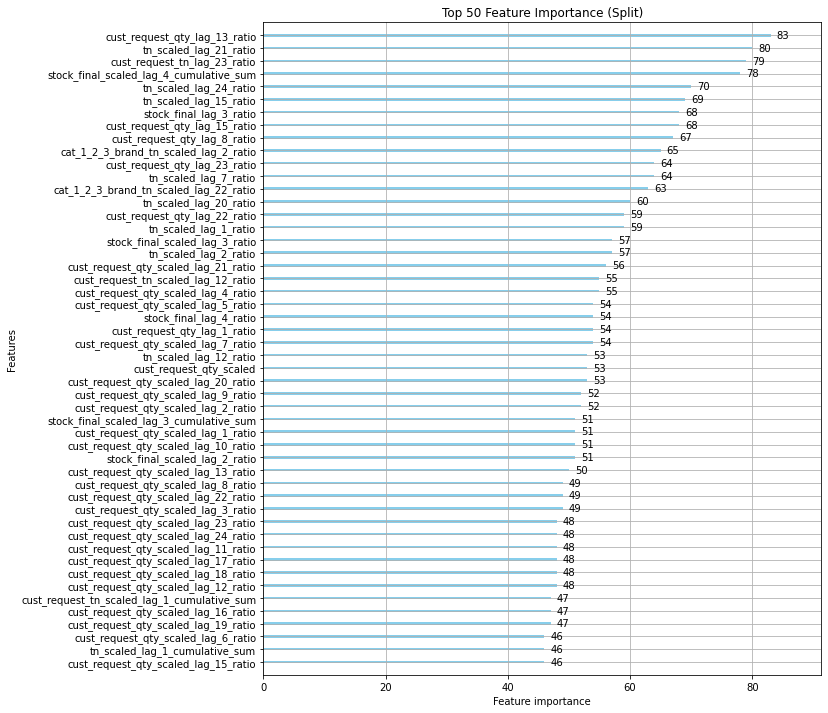

In [20]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your trained model in the 'model' variable

# Get feature importance
feature_importance = model.feature_importance(importance_type='split')

# Get the indices of the top 50 features
top_features_indices = np.argsort(feature_importance)[-50:][::-1]

# Get corresponding feature names
feature_names = model.feature_name()

# Create a mapping of feature index to feature name
feature_map = dict(zip(range(len(feature_names)), feature_names))

# Map indices to feature names for top features
top_feature_names = [feature_map[i] for i in top_features_indices]

# Sort feature importance values
sorted_feature_importance = feature_importance[top_features_indices]

# Plot only the top 50 features
fig, ax = plt.subplots(figsize=(10, 12))
lgb.plot_importance(model, ax=ax, importance_type='split', title='Top 50 Feature Importance (Split)',
                    max_num_features=50, color='skyblue')

# Set ytick labels to the feature names
ax.set_yticklabels(top_feature_names)
plt.show()




In [98]:
model.feature_importance()

array([ 9, 31,  6, ...,  5,  0,  2], dtype=int32)

In [97]:
gain_importance

<bound method Booster.feature_importance of <lightgbm.basic.Booster object at 0x7f7de48b5400>>

In [21]:
# Obtain gain feature importance
gain_importance = model.feature_importance(importance_type='gain')

# Display feature importance with feature names
feature_names = model.feature_name()
gain_importance_df = pd.DataFrame({'Feature': feature_names, 'Gain': gain_importance})
gain_importance_df=gain_importance_df.sort_values(by='Gain', ascending=False)

In [22]:
gain_importance_df.iloc[:100,:]

,Feature,Gain
44,usd_oficial_max_scaled,4843.213361
894,cust_request_tn_scaled_lag_1_cumulative_sum,4768.116174
4469,usd_oficial_max_scaled_rolling_mean_win_2,4668.880538
3516,usd_oficial_max_rolling_std_win_5,4046.110977
47,int_ca_scaled,3840.295506
...,...,...
15,cust_request_tn_scaled,113.081077
1975,cat_1_tn_scaled_lag_2,112.859926
4954,int_pf_scaled_rolling_std_win_4,112.740939
3171,tn_bigger_sku_scaled_lag_1,112.639411


In [23]:
gain_importance_df.Feature[:500]

44                               usd_oficial_max_scaled
894         cust_request_tn_scaled_lag_1_cumulative_sum
4469          usd_oficial_max_scaled_rolling_mean_win_2
3516                  usd_oficial_max_rolling_std_win_5
47                                        int_ca_scaled
                             ...                       
2734    cat_1_2_3_brand_tn_scaled_lag_11_cumulative_sum
2653                   cat_1_2_3_tn_scaled_lag_21_ratio
838       cust_request_qty_scaled_lag_17_cumulative_sum
2118               cat_2_tn_scaled_lag_7_cumulative_sum
2931                                tn_bigger_sku_lag_1
Name: Feature, Length: 500, dtype: object

In [27]:
split_importance_df

,Feature,Split
829,cust_request_qty_scaled_lag_15_ratio,83
654,tn_scaled_lag_1_cumulative_sum,80
793,cust_request_qty_scaled_lag_6_ratio,79
845,cust_request_qty_scaled_lag_19_ratio,78
833,cust_request_qty_scaled_lag_16_ratio,70
...,...,...
3701,itcrm_lag_13_ratio,0
3700,itcrm_trend_lag_13,0
3699,itcrm_lag_13,0
3698,itcrm_lag_12_cumulative_sum,0


In [24]:
# Obtain split feature importance
split_importance = model.feature_importance(importance_type='split')

# Display feature importance
feature_names = model.feature_name()
split_importance_df = pd.DataFrame({'Feature': feature_names, 'Split': split_importance})
split_importance_df=split_importance_df.sort_values(by='Split', ascending=False)

In [25]:
unique_features = list(set(split_importance_df.Feature[:500]).union(set(gain_importance_df.Feature[:500])))
unique_features


['brand_tn_lag_20_ratio',
 'cust_request_tn_scaled',
 'tn_bigger_sku_scaled_lag_24_ratio',
 'cat_2_tn_scaled_trend_lag_14',
 'brand_tn_lag_13_ratio',
 'cat_1_tn_lag_6_ratio',
 'cust_request_tn_lag_15_ratio',
 'stock_final_scaled_lag_4_ratio',
 'cust_request_qty_scaled_lag_16_ratio',
 'cat_3_tn_scaled_rolling_std_win_2',
 'cust_request_qty_scaled_lag_1_ratio',
 'tn_smaller_sku_lag_13_ratio',
 'cust_request_tn_lag_17_ratio',
 'cat_1_2_3_tn_scaled_lag_8_ratio',
 'int_pf_scaled_lag_9_ratio',
 'tn_scaled_lag_16_ratio',
 'cust_request_tn_scaled_lag_6_ratio',
 'cat_3_tn_scaled_lag_23_ratio',
 'cat_1_2_3_brand_tn_scaled_lag_10_ratio',
 'brand_tn_scaled_lag_17_ratio',
 'cust_request_tn_scaled_lag_12_ratio',
 'cat_1_2_3_tn_scaled_lag_24_ratio',
 'tn_smaller_sku_scaled_lag_1_cumulative_sum',
 'cat_1_2_3_brand_tn_lag_23_ratio',
 'tn_scaled_lag_1',
 'cust_request_qty_lag_8_ratio',
 'cust_request_tn_lag_5_ratio',
 'tn_smaller_sku_lag_16_ratio',
 'cat_3_tn_scaled_lag_3_ratio',
 'cust_request_tn_scale

In [28]:
X_train=X_train[unique_features]
X_test=X_test[unique_features]

In [29]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your data in X_train, Y_train_sc, X_test, and Y_test_sc

# Define your custom metric function (MAPE)
def mape(y_pred, dataset):
    y_true = dataset.get_label()
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true)
    return 'MAPE', np.mean(absolute_percentage_errors) * 100, False

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=Y_train_sc, categorical_feature='auto')

# Specify time series specific parameters
ts_params = {
    'objective': 'regression',
    'metric': 'l1',  # Using 'l1' as the default metric for early stopping
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_freq': 1,
    'bagging_fraction': 0.8,
    'min_data_in_leaf': 5,
    'min_sum_hessian_in_leaf': 5
}

# Train the LightGBM model with MAPE as the evaluation metric
model = lgb.train(
    ts_params,
    train_data,
    valid_sets=[train_data],
    num_boost_round=1000,
    feval=mape
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the MAPE on the validation set
mape_val = mape(y_pred, val_data)[1]
print(f"MAPE on Validation Set: {mape_val}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176590
[LightGBM] [Info] Number of data points in the train set: 21099, number of used features: 714
[LightGBM] [Info] Start training from score -0.056686
MAPE on Validation Set: 174.48832486728367%


In [38]:
X_test


,brand_tn_lag_20_ratio,cust_request_tn_scaled,tn_bigger_sku_scaled_lag_24_ratio,cat_2_tn_scaled_trend_lag_14,brand_tn_lag_13_ratio,cat_1_tn_lag_6_ratio,cust_request_tn_lag_15_ratio,stock_final_scaled_lag_4_ratio,cust_request_qty_scaled_lag_16_ratio,cat_3_tn_scaled_rolling_std_win_2,...,cat_3_tn_scaled_rolling_mean_win_6,cust_request_qty_scaled_trend_lag_2,cat_3_tn_lag_9_ratio,cat_1_2_3_tn_scaled_lag_18_ratio,cust_request_tn_scaled_lag_17_ratio,cust_request_qty_lag_7_ratio,cust_request_tn_trend_lag_1,ipc_scaled_rolling_std_win_5,cat_3_tn_scaled_lag_13_ratio,tn_smaller_sku_scaled_lag_24_cumulative_sum
25,-0.054568,-0.233219,NaN,-1.171244,-0.046282,0.113420,0.100819,NaN,1.550525,0.084291,...,0.623474,-0.848646,0.204990,-0.263317,-0.506595,-0.078471,-27.76995,0.309310,-0.190693,1.184452
51,-0.069762,0.387028,NaN,-1.171244,-0.175787,0.113420,-0.120946,NaN,-3.003110,0.084291,...,0.623474,-0.055758,0.204990,-0.263317,-1.275542,-0.091650,-287.62174,0.309310,-0.190693,1.454902
77,0.016357,-0.585508,-0.823365,-0.876605,-0.213575,0.224044,-0.282240,NaN,-0.188875,0.171367,...,0.064920,0.752015,0.133825,-2.302271,-7.319720,-0.176039,-215.58471,0.309310,16.170232,2.967805
103,0.016357,-1.031106,-1.127075,-0.876605,-0.213575,0.224044,-0.313836,NaN,-0.415182,0.171367,...,0.064920,0.026666,0.133825,-2.302271,0.642387,-0.031785,-87.67762,0.309310,16.170232,0.508376
129,0.016357,-0.947127,-0.537341,-0.876605,-0.213575,0.224044,-0.188812,NaN,-0.865963,0.171367,...,0.064920,0.958742,0.133825,-2.302271,0.481841,0.078947,37.77627,0.309310,16.170232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,-0.137196,-0.789176,4.283262,NaN,-0.066953,0.187675,0.199811,NaN,1.428571,0.593737,...,NaN,-1.133440,-0.108135,-1.434696,-1.882114,0.461538,0.00845,1.118034,-0.989643,NaN
21903,0.464984,-0.796935,NaN,NaN,-0.140186,0.174544,-0.700551,NaN,-1.149826,0.593737,...,NaN,-0.667967,NaN,-0.989643,0.232888,-0.257143,0.03106,1.118034,0.224850,NaN
21908,0.130530,-0.774496,NaN,NaN,-0.299056,0.174544,-0.029841,NaN,1.081081,0.385642,...,NaN,-0.273588,NaN,0.224850,-0.612307,-0.500000,0.01551,1.118034,0.456433,NaN
21928,0.464984,-1.328586,NaN,-0.574105,-0.079007,-0.034354,0.686502,NaN,-inf,0.166986,...,-0.978947,0.664822,0.564815,-0.845952,0.201613,0.333333,0.00745,0.333070,2.961460,NaN


In [36]:
df[(df.periodo==201902)]

,id_row,periodo,product_id,cust_request_qty,cust_request_tn,tn,tn_mas_1,tn_mas_2,stock_final,cat1,...,temp_min_scaled_rolling_mean_win_8,temp_min_scaled_rolling_std_win_8,temp_min_scaled_rolling_mean_win_9,temp_min_scaled_rolling_std_win_9,temp_min_scaled_rolling_mean_win_10,temp_min_scaled_rolling_std_win_10,temp_min_scaled_rolling_mean_win_11,temp_min_scaled_rolling_std_win_11,temp_min_scaled_rolling_mean_win_12,temp_min_scaled_rolling_std_win_12
25,25,201902,20001,367.0,1343.99435,1259.09363,1470.65653,1647.63848,546.07997,1,...,-0.059122,1.085727,-0.253778,1.171526,-0.267090,1.105328,-0.167011,1.099886,-0.111867,1.065956
51,51,201902,20002,377.0,1090.26594,1043.01349,1083.62552,1287.62346,35.82437,1,...,-0.059122,1.085727,-0.253778,1.171526,-0.267090,1.105328,-0.167011,1.099886,-0.111867,1.065956
77,77,201902,20003,361.0,768.28561,758.32657,638.04010,565.33774,592.10902,0,...,-0.059122,1.085727,-0.253778,1.171526,-0.267090,1.105328,-0.167011,1.099886,-0.111867,1.065956
103,103,201902,20004,365.0,449.98505,441.70332,619.77084,466.70901,417.15840,0,...,-0.059122,1.085727,-0.253778,1.171526,-0.267090,1.105328,-0.167011,1.099886,-0.111867,1.065956
129,129,201902,20005,328.0,418.14628,409.89950,488.21387,624.99880,0.58415,0,...,-0.059122,1.085727,-0.253778,1.171526,-0.267090,1.105328,-0.167011,1.099886,-0.111867,1.065956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21898,201902,21261,16.0,0.04656,0.04656,0.06071,0.02823,0.74570,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21903,21903,201902,21262,15.0,0.05786,0.05786,0.06353,0.01412,0.76548,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21908,21908,201902,21263,17.0,0.05927,0.05927,0.06636,0.01835,0.79372,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21928,21928,201902,21264,11.0,0.01378,0.01378,0.00186,0.00708,0.10619,3,...,0.010156,1.083929,-0.184179,1.169586,-0.197469,1.103497,-0.097555,1.098064,-0.042503,1.064190


In [31]:
df[(df.periodo==201902)]['product_id'].values

array([20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009,
       20010, 20011, 20012, 20013, 20014, 20015, 20016, 20017, 20018,
       20019, 20020, 20021, 20022, 20023, 20024, 20025, 20026, 20027,
       20028, 20029, 20030, 20031, 20032, 20033, 20034, 20035, 20036,
       20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044, 20045,
       20046, 20047, 20048, 20049, 20050, 20051, 20052, 20053, 20054,
       20055, 20056, 20057, 20058, 20059, 20060, 20061, 20062, 20063,
       20064, 20065, 20066, 20067, 20068, 20069, 20070, 20071, 20072,
       20073, 20074, 20075, 20076, 20077, 20078, 20079, 20080, 20081,
       20082, 20084, 20085, 20086, 20087, 20088, 20089, 20090, 20091,
       20092, 20093, 20094, 20095, 20096, 20097, 20099, 20100, 20101,
       20102, 20103, 20105, 20106, 20107, 20108, 20109, 20111, 20112,
       20113, 20114, 20115, 20116, 20117, 20118, 20119, 20120, 20121,
       20122, 20123, 20124, 20125, 20126, 20128, 20129, 20130, 20131,
       20132, 20133,

In [32]:
y_pred_df=pd.DataFrame({'product_id':df[(df.periodo==201902)]['product_id'].values,'y_pred':y_pred})

In [34]:
y_pred_df

,product_id,y_pred
0,20001,-0.643693
1,20002,-0.404583
2,20003,-0.426858
3,20004,-0.964268
4,20005,-1.113360
...,...,...
889,21261,-0.577282
890,21262,-0.834262
891,21263,-0.921297
892,21264,-1.048900


In [164]:
import joblib
# Create an empty DataFrame to store the inverse transformed values
inverse_transformed_df = pd.DataFrame()
grouped = y_pred_df.groupby('product_id')['y_pred']
column_to_standardize = 'y_pred'


# Load the scaler object from the file
scalers = joblib.load('scalers_product_tn.joblib')

# Inverse transform each group and concatenate the results
for group_name, group_data in grouped:
    # Extract the values to be inverse transformed
    values_to_inverse_transform = y_pred_df.loc[group_data.index][column_to_standardize].values.reshape(-1, 1)

    # Retrieve the scaler for this group from the dictionary
    scaler = scalers[group_name]

    # Inverse transform the data using the original mean and standard deviation
    inverse_transformed_values = scaler.inverse_transform(values_to_inverse_transform)

    # Create a DataFrame with the inverse transformed values and 'product_id' as the index
    group_df = pd.DataFrame(inverse_transformed_values, index=group_data.index, columns=[column_to_standardize])

    # Concatenate the group DataFrame to the overall inverse transformed DataFrame
    inverse_transformed_df = pd.concat([inverse_transformed_df, group_df])

# Sort the DataFrame by index to get the original order
y_pred_df_transformed = inverse_transformed_df.sort_index()


,y_pred
0,1229.897132
1,901.779920
2,894.422795
3,447.874666
4,442.406315
...,...
889,0.202544
890,0.142467
891,0.116528
892,0.029812


In [158]:
y_test_df=pd.DataFrame({'product_id':df[(df.periodo==201902)]['product_id'].values,'tn_mas_2_scaled':df[(df.periodo==201902)]['tn_mas_2_scaled'].values,'tn_mas_2_real':df[(df.periodo==201902)]['tn_mas_2'].values})

In [159]:
y_test_df

,product_id,tn_mas_2_scaled,tn_mas_2_real
0,20001,0.890697,1647.63848
1,20002,1.284155,1287.62346
2,20003,-1.196464,565.33774
3,20004,-0.880876,466.70901
4,20005,0.052489,624.99880
...,...,...,...
889,21261,-0.880624,0.02823
890,21262,-1.037490,0.01412
891,21263,-0.976292,0.01835
892,21264,-1.547264,0.00708


In [163]:
import joblib
# Create an empty DataFrame to store the inverse transformed values
inverse_transformed_df = pd.DataFrame()
grouped = y_test_df.groupby('product_id')['tn_mas_2_scaled']
column_to_standardize = 'tn_mas_2_scaled'


# Load the scaler object from the file
scalers = joblib.load('scalers_product_tn.joblib')

# Inverse transform each group and concatenate the results
for group_name, group_data in grouped:
    # Extract the values to be inverse transformed
    values_to_inverse_transform = y_test_df.loc[group_data.index][column_to_standardize].values.reshape(-1, 1)

    # Retrieve the scaler for this group from the dictionary
    scaler = scalers[group_name]

    # Inverse transform the data using the original mean and standard deviation
    inverse_transformed_values = scaler.inverse_transform(values_to_inverse_transform)

    # Create a DataFrame with the inverse transformed values and 'product_id' as the index
    group_df = pd.DataFrame(inverse_transformed_values, index=group_data.index, columns=[column_to_standardize])

    # Concatenate the group DataFrame to the overall inverse transformed DataFrame
    inverse_transformed_df = pd.concat([inverse_transformed_df, group_df])

# Sort the DataFrame by index to get the original order
y_test_df_transformed = inverse_transformed_df.sort_index()

In [166]:
y_test_df_transformed

,tn_mas_2_scaled
0,1647.63848
1,1287.62346
2,565.33774
3,466.70901
4,624.99880
...,...
889,0.02823
890,0.01412
891,0.01835
892,0.00708


In [170]:
total=y_pred_df_transformed.join(y_test_df_transformed)

In [175]:
total['diffe']=np.abs(total['y_pred']-total['tn_mas_2_scaled'])

In [26]:
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import optuna

In [ ]:
import optuna
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Assuming X_train, X_test, Y_train_sc, Y_test_sc are defined

# Define the number of trials
n_trials = 50

# Define a list of random seeds
seeds = [ 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157,
          163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 
          251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 
          353, 359, 367, 373, 379, 383, 389, 397]

# Create a list to store the results
results = []

def objective(trial):
    # Select a random seed for this trial
    seed = np.random.choice(seeds)
    
    train_x, test_x, train_y, test_y = X_train, X_test, Y_train_sc, Y_test_sc
    param = {
        'metric': 'rmse', 
        'random_state': seed,  # Use the selected seed
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006, 0.008, 0.01, 0.014, 0.017, 0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10, 20, 100]),
        'num_leaves': trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth': trial.suggest_int('cat_smooth', 1, 100),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.1, 10)
    }
    
    model = LGBMRegressor(**param)  
    
    model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds, squared=False)
    
    # Save the results for each trial
    results.append({'seed': seed, 'hyperparameters': param, 'rmse': rmse})
    
    # Save the model with a unique identifier
    model_name = f"'/home/all4data118/exp/model_es_a/product/model_trial_{trial.number}_seed_{seed}_rmse_{rmse:.4f}.joblib"
    joblib.dump(model, model_name)
    
    return rmse

# Create a list to store the best trial parameters
best_trial_params = []

# Iterate through trials
for _ in range(n_trials):
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)
    best_trial_params.append(study.best_trial.params)

# Print the best trial parameters
print('Best trial parameters:')
for params in best_trial_params:
    print(params)

# Print the results for each trial
print('Results for each trial:')
for result in results:
    print(result)


In [5]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def get_prime_numbers(limit):
    primes = [num for num in range(2, limit) if is_prime(num)]
    return primes

# Specify the limit for prime numbers
limit = 400

# Get the list of prime numbers up to the specified limit
prime_numbers = get_prime_numbers(limit)

print("List of prime numbers up to {}: {}".format(limit, prime_numbers))

List of prime numbers up to 400: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397]


In [4]:
prime_numbers

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]